<a href="https://colab.research.google.com/github/Elakkiyasivadevan/PRODIGY_DS_01/blob/main/Prodigy_DS_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv("PopulationData.csv")

In [10]:
print(df)

                    Country Name Country Code     Indicator Name  \
0                          Aruba          ABW  Population, total   
1    Africa Eastern and Southern          AFE  Population, total   
2                    Afghanistan          AFG  Population, total   
3     Africa Western and Central          AFW  Population, total   
4                         Angola          AGO  Population, total   
..                           ...          ...                ...   
261                       Kosovo          XKX  Population, total   
262                  Yemen, Rep.          YEM  Population, total   
263                 South Africa          ZAF  Population, total   
264                       Zambia          ZMB  Population, total   
265                     Zimbabwe          ZWE  Population, total   

    Indicator Code         1960         1961         1962         1963  \
0      SP.POP.TOTL      54922.0      55578.0      56320.0      57002.0   
1      SP.POP.TOTL  130072080.0  13

In [11]:
population_2021 = df[["Country Name", "2021"]].dropna()
population_2021["2021"] = pd.to_numeric(population_2021["2021"], errors="coerce")
population_2021 = population_2021.dropna()

LINE PLOT

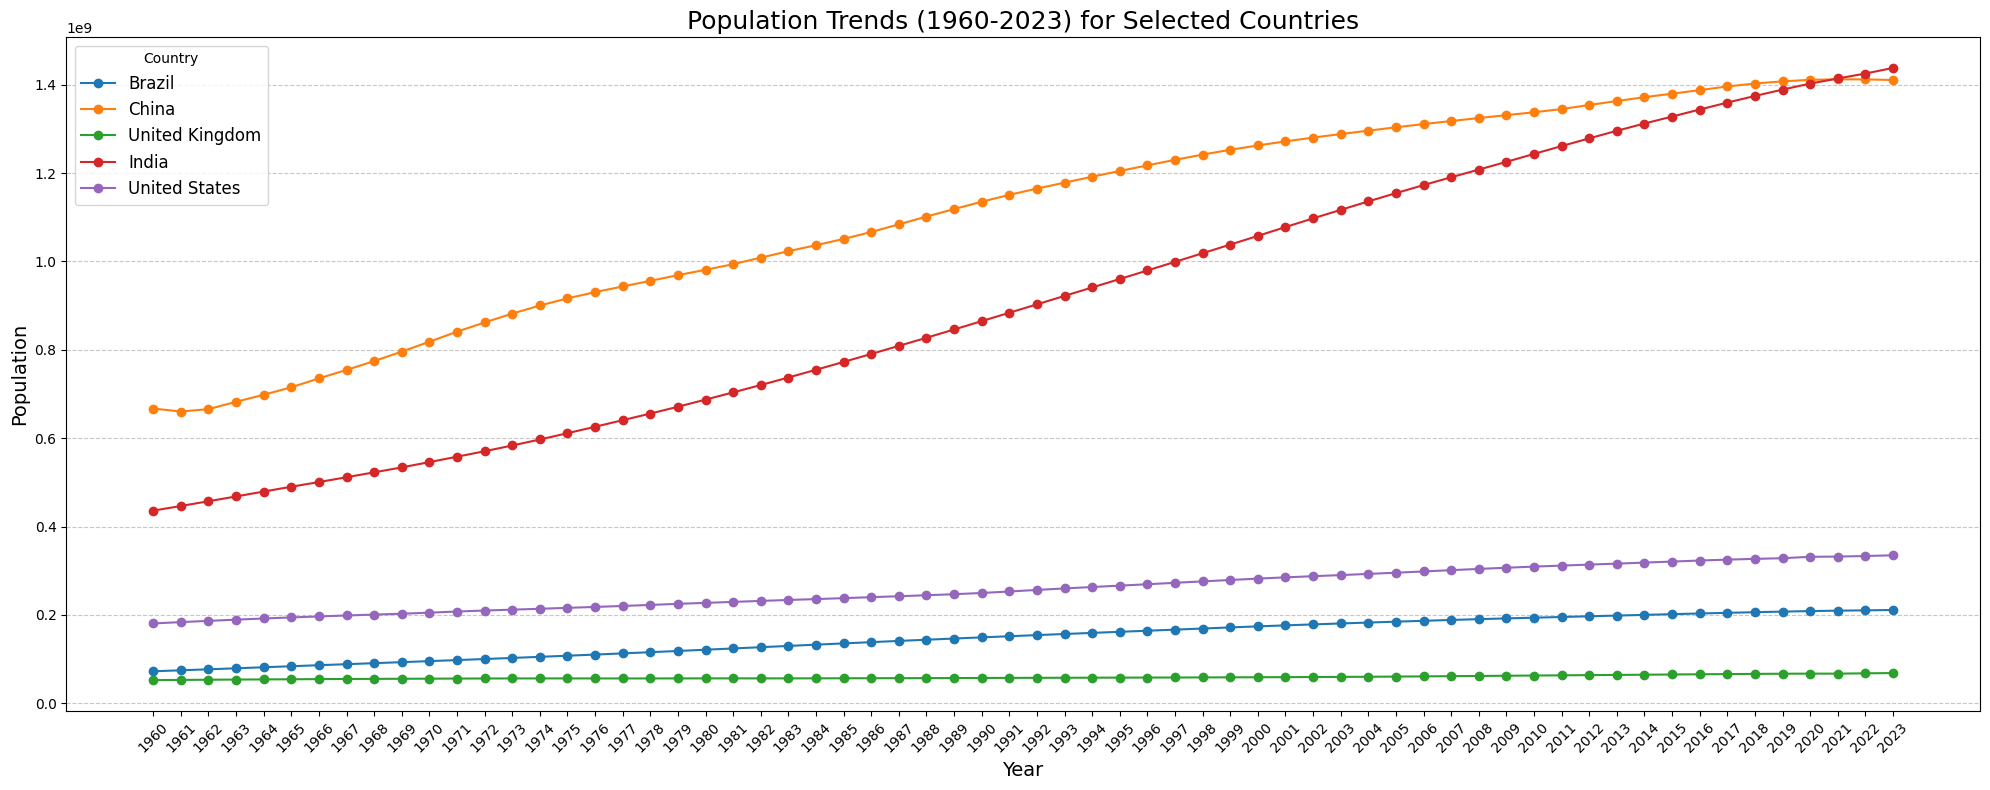

In [13]:
selected_countries = df[df["Country Name"].isin(["India", "China", "United States", "Brazil", "United Kingdom"])]

population_years = selected_countries.iloc[:, 4:].apply(pd.to_numeric, errors="coerce").T
population_years.columns = selected_countries["Country Name"]
if "Population Rise" in population_years.index:
    population_years = population_years.drop(index="Population Rise")

plt.figure(figsize=(20, 8))
for country in population_years.columns:
    plt.plot(population_years.index, population_years[country], label=country, marker="o")

plt.xticks(population_years.index, rotation=45)

plt.title("Population Trends (1960-2023) for Selected Countries", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Population", fontsize=14)
plt.legend(title="Country", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


This graph shows the population trends of Brazil, China, the United Kingdom, India, and the United States from 1960 to 2023.

China and India dominate in population size. China's growth was steady until around 2020, when it plateaued, likely due to policies like the one-child rule and an aging population. India, however, shows consistent growth, nearly matching China's population by 2023.

The United States exhibits stable, linear growth, while Brazil follows a similar pattern but at a slower pace, with signs of tapering in recent years. This suggests demographic transitions are reducing Brazil's growth rate.

The United Kingdom has the smallest and slowest-growing population among these countries, reflecting long-term stability.

The graph highlights sharp contrasts between the rapid growth in developing nations like India and Brazil and the stable trends in developed countries like the US and UK. China's plateau signals a shift driven by policy and demographics.

LINE PLOT

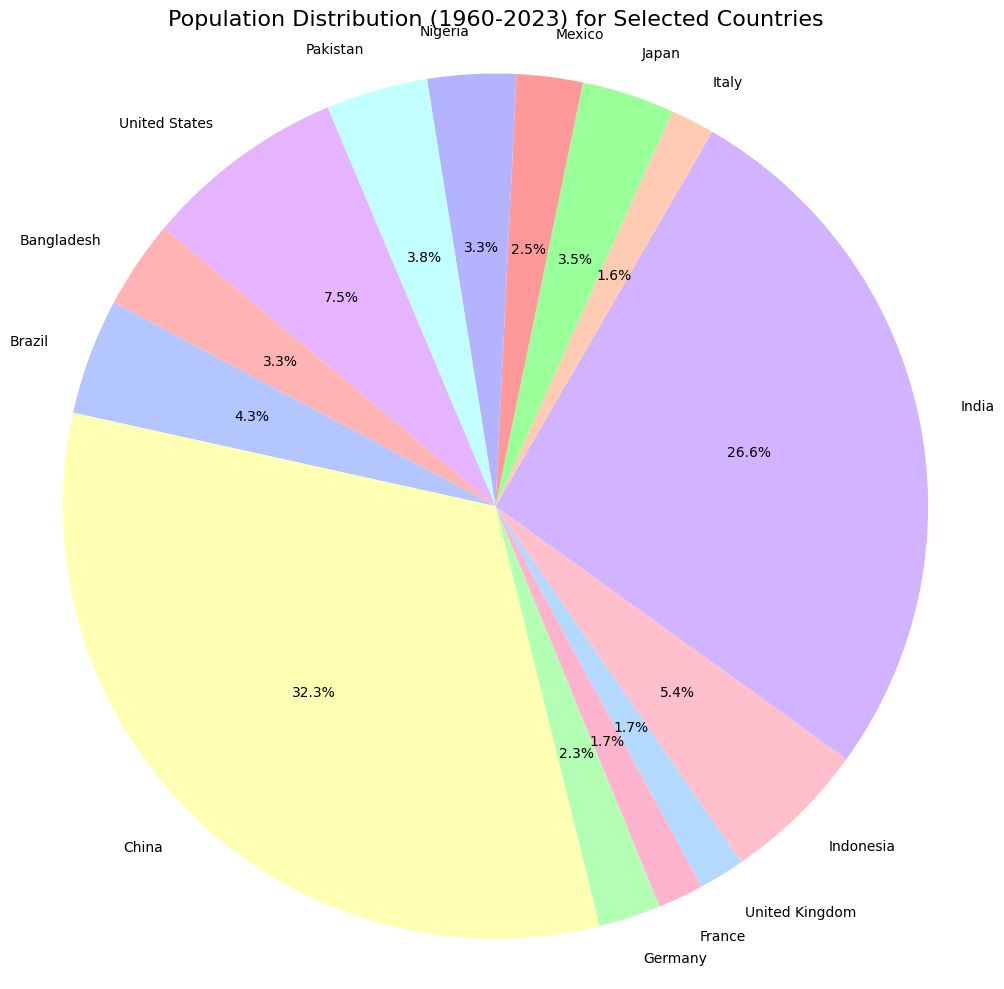

In [15]:
selected_countries = df[df["Country Name"].isin([
    "India", "China", "United States", "Brazil", "United Kingdom",
    "Germany", "Indonesia", "Mexico", "Russia", "Japan",
    "Nigeria", "Pakistan", "Bangladesh", "France", "Italy"
])].copy()

population_total = selected_countries.iloc[:, 4:].apply(pd.to_numeric, errors="coerce").sum(axis=1)

selected_countries.loc[:, "Total Population (1960-2023)"] = population_total

lighter_colors = [
    '#FFB3B3', '#B3C6FF', '#FFFFB3', '#B3FFB3', '#FFB3CC', '#B3D9FF',
    'pink', '#D1B3FF', '#FFCCB3', '#99FF99', '#FF9999', '#B3B3FF',
    '#C2FFFF', '#E6B3FF', '#B3FFCC'
]

plt.figure(figsize=(10, 10))
plt.pie(
    selected_countries["Total Population (1960-2023)"],
    labels=selected_countries["Country Name"],
    autopct="%1.1f%%",
    startangle=140,
    colors=lighter_colors[:len(selected_countries)]
)
plt.title("Population Distribution (1960-2023) for Selected Countries", fontsize=16)
plt.axis("equal")
plt.tight_layout()
plt.show()


This pie chart illustrates the total population distribution (1960–2023) across 15 selected countries. China and India dominate, comprising 32.3% and 26.6% of the total, respectively, reflecting their massive populations. The United States follows with 7.5%, while Indonesia contributes 5.4%. Other countries, including Brazil, Nigeria, and Bangladesh, show smaller but significant shares ranging from 3% to 4%. Developed nations like Japan, Germany, and the United Kingdom account for much smaller portions, indicating their relatively stable or declining populations over time. Overall, the chart highlights the overwhelming population concentration in Asia compared to other regions.